# Terningar

```{note}Merk

Eg nyttar den anbefalte måten å nytta numpy.random (sjekk [dokumentasjonen](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random))

```

In [1]:
import numpy as np                                 # Importerer numpy som np

from numpy.random import default_rng               # Importerer default_rng
rng = default_rng()                                # Lager en rng (random number generator)

## Ein og ein terning

Det enklaste dømet på simulering av stokastiske forsøk er trilling av terning

In [4]:
terning = rng.integers(1, 7)
print(terning)

4


Viss me vil kan me bruka løkker for å trilla terningar fleire gongar:

In [5]:
for i in range(10):
    print(rng.integers(1, 7))

1
3
4
1
4
2
3
2
5
1


eller så kan me legga inn ein verdi for `size` i funksjonen. Dette vil gje oss ein `array` med `size` terningar. 

In [6]:
terningar = rng.integers(1, 7, size=10)
print(terningar)

[4 6 6 6 3 3 5 1 6 3]


Viss me til dømes vil finna ut kor sannsynleg det er å trilla 5 eller 6 gjennom simulering så kan me gjera det på ulike måtar. Basert på dei to alternativa over gjer det oss desse to:

### Alternativ 1 - løkke

In [17]:
N = 1000000

gunstige = 0

for i in range(N):
    terning = rng.integers(1, 7)
    if terning >= 5:
        gunstige += 1

sannsyn = gunstige / N

print(f"Sannsynet for å trilla 5 eller høgare er {round(sannsyn, 3)}")

Sannsynet for å trilla 5 eller høgare er 0.333


### Alternativ 2 - array

In [18]:
N = 1000000

terningar = rng.integers(1, 7, size=N)

gunstige = sum(terningar >= 5) # finn antall terningar som er større eller lik 5

sannsyn = gunstige / N

print(f"Sannsynet for å trilla 5 eller høgare er {round(sannsyn, 3)}")

Sannsynet for å trilla 5 eller høgare er 0.334


## Fleire terningar

Spørsmål som "Kva er sannsynet for at produktet av to terningar er 8 eller mindre" er fint å finna svar på ved hjelp av simulering. Igjen kan me gjera det på fleire måtar, eg viser ved hjelp av løkker og arrays. 

### Alternativ 1 - løkke

In [21]:
N = 1000000

gunstige = 0    

for i in range(N):
    terning1 = rng.integers(1, 7)
    terning2 = rng.integers(1, 7)

    # sjekkar om produktet er 8 eller mindre
    if terning1 * terning2 <= 8:
        gunstige += 1

sannsyn = gunstige / N

print(f"Sannsynet for at produktet av to terningar er 8 eller mindre er {round(sannsyn, 3)}")

Sannsynet for at produktet av to terningar er 8 eller mindre er 0.443


### Alternativ 2 - arrays

In [22]:
N = 1000000

terning1 = rng.integers(1, 7, size = N)
terning2 = rng.integers(1, 7, size = N)

produkt = terning1 * terning2

gunstige = sum(produkt <= 8)

sannsyn = gunstige / N

print(f"Sannsynet for at produktet av to terningar er 8 eller mindre er {round(sannsyn, 3)}")

Sannsynet for at produktet av to terningar er 8 eller mindre er 0.444


```{tip} Tips

Kodelinja `produkt = terning1 * terning2` finn produktet av element på samme plass i dei to arrayene

```

In [23]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

c = a * b

print(c)

[ 6 14 24 36 50]


## Nøyaktighet

Sjekkar kva som skjer når me triller fleire og fleire terningar. For å visa samanhengen plottar me resultatet.
I dømet ser me på sannsynet for å trilla 4 på ein terning. 

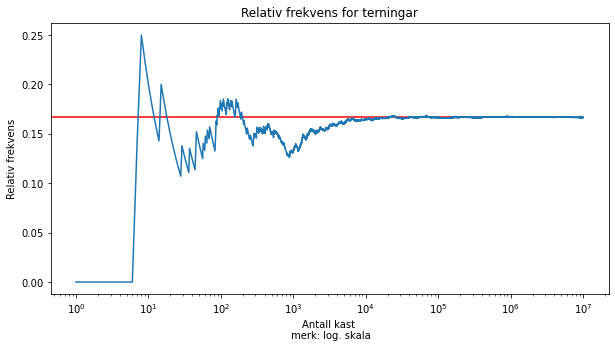

In [38]:
import matplotlib.pyplot as plt

# antall kast
N = 10000000

# triller terningar
terningar = rng.integers(1, 7, size=N)

# finn den kumulative summen av terningar som er lik 4
kumulativ_sum = np.cumsum(terningar == 4)

# lager "x-akse" frå 1 til N
x = np.arange(1, N + 1)

# finn relativ frekvens
rel_frekvens = kumulativ_sum / x

plt.figure(figsize=(10, 5))                      # lagar ein figur med 10x5 mål
plt.hlines(1/6, 0, N, color="red")               # teiknar ein linje med farge "red" for den teoretiske verdien
plt.plot(x, rel_frekvens)                        # plottar x-akse og y-akse    
plt.xscale("log")                                # logaritmisk x-akse
plt.xlabel("Antall kast \n merk: log. skala")    # namn på x-aksen
plt.ylabel("Relativ frekvens")                   # namn på y-aksen
plt.title("Relativ frekvens for terningar")      # tittel på figur
plt.show()


Her ser me at di fleire kast me gjennomfører, di nærare kjem den relative frekvensen den teoretiske verdien for å trilla ein firar på vanleg terning.

```{math}
P(\text{firar}) = \frac{1}{6} \approx 0.167
```